## Classifiers

Logistic regression classifier
1. A basic implementation using stochasic gradient descent
2. Logistic regression in the scikit-learn package

In [7]:
# Logistic regression with stochastic gradient descent
import numpy as np
import math

def g(z):
    return 1/(1+math.exp(-z)) # Sigmoid function

def logreg_sgd(X, y, alpha=0.01, max_epochs=100):
    # Naive implementation of SGD
    # Fixed number of iterations and fixed step-size
    n,p = X.shape
    theta=np.zeros(p)
    for iter in range(max_epochs*n):
        i=np.random.randint(n)
        theta_old = theta
        theta = theta + alpha*(y[i] - g(theta.dot(X[i,:])))*X[i,:]
    return theta

Number of training points: 100
Logistic regression coeffs= [-0.1082 -5.6037  0.268 ]


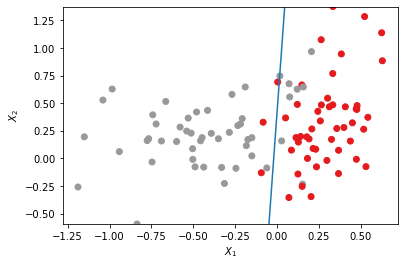

In [9]:
# Test the SGD inplementaion on an artificial 2D data set

from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True, precision=4) # Formatting of output

# Create an artificial 2D data set using a function from scikit-learn
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                        random_state=1, n_clusters_per_class=1, class_sep=0.3)
n=len(y)
X=np.c_[np.ones(n), X] # Add intercept term
print('Number of training points:', n)

theta=logreg_sgd(X, y)
print("Logistic regression coeffs=", theta)

# Visualize the data and draw the decision boundary (points that satisfy θ'x = 0)
plt.scatter(X[:,1],X[:,2],c=y,cmap='Set1')
xtmp=np.array([min(X[:,1]),max(X[:,1])])
plt.plot(xtmp, -(theta[0]+theta[1]*xtmp)/theta[2])
plt.ylim(min(X[:,2]),max(X[:,2]))
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()

In [12]:
# The Wisconsin breast cancer data set has 569 examples of benign and malignant (cancerous) tumors
# There are 30 features (inputs) including patient age and quantities derived from tissue samples
# (e.g.tumor size)
# This data set has been included as a test case in a large number of ML publications in the past
#
# Source: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)
import numpy as np
from sklearn.datasets import load_breast_cancer # This data set comes with scikit
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X, y = load_breast_cancer(True)
print("Shape of training set: ", X.shape)
print("Total number of benign samples: ", sum(y==1))
print("Total number of malignant samples: ", sum(y==0))

# Split randomly into training and test sets
# (an alternative would be to use k-fold cross validation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
n_train=len(y_train)
n_test=len(y_test)


# Train a logistic regression classifier
X_train=np.c_[np.ones(n_train), X_train] # Add intercept
theta=logreg_sgd(X_train, y_train, 0.000001, 100)


# Classify training set
y_pred = 1*(X_train.dot(theta) > 0) # 1*(...) forces a conversion from bool to int
error_rate = np.average(y_train != y_pred)
print("Training set error rate: {0:1.3f}".format(error_rate))

# Classify test set
X_test=np.c_[np.ones(n_test), X_test] # Add intercept
y_pred = 1*(X_test.dot(theta) > 0)
error_rate = sum(y_test != y_pred)/n_test
print("Test set error rate: {0:1.3f}".format(error_rate))

# Curiously, the test set error is usually somewhat lower than the training set error
# This is probably due to the primitive stopping criterion uzed in the above SGD code

# Analyze incorrect predictions in more detail
# (see also confusion matrix below)
print("Test examples incorrectly predicted as benign: ", sum(np.logical_and(y_pred == 0, y_test == 1)))
print("Test examples incorrectly predicted as malignant: ", sum(np.logical_and(y_pred == 1, y_test == 0)))

# Scikit can also calculate these summary statistics
# (often referred to as "true negatives", "false negatives", "true positives", "false positives")
C = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n",C)

Shape of training set:  (569, 30)
Total number of benign samples:  357
Total number of malignant samples:  212
Training set error rate: 0.100
Test set error rate: 0.069
Test examples incorrectly predicted as benign:  0
Test examples incorrectly predicted as malignant:  13
Confusion matrix:
 [[ 54  13]
 [  0 121]]


In [9]:
# Use the logistic regression implementation in scikit-learn
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression(C=1.0,max_iter=5000) # L2 penalty is included by default (controlled by the C parameter)
reg.fit(X_train, y_train)

# Classify training set
y_pred = reg.predict(X_train)
print("Training set error: {0:1.3f}".format(np.average(y_pred != y_train)))

# Classify test set
y_pred = reg.predict(X_test)
print("Test set error: {0:1.3f}".format(np.average(y_pred != y_test)))

Training set error: 0.039
Test set error: 0.032
